In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import time
import os
from PIL import Image
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import zipfile
import os
from google.colab import files


import logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)

In [ ]:
# Upload dataset from local machine
uploaded = files.upload()

# Extract the uploaded zip file
zip_file = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('dataset')

# Verify extraction
os.listdir('dataset')


Saving train_ASD_DATA.zip to train_ASD_DATA.zip


['train_ASD_DATA']

In [ ]:
# Upload dataset from local machine
uploaded = files.upload()

# Extract the uploaded zip file
zip_file = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('dataset')

# Verify extraction
os.listdir('dataset')


Saving test_ASD_DATA.zip to test_ASD_DATA.zip


['train_ASD_DATA', 'test']

In [ ]:
# Upload dataset from local machine
uploaded = files.upload()

# Extract the uploaded zip file
zip_file = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('dataset')

# Verify extraction
os.listdir('dataset')


Saving valid_ASD_DATA.zip to valid_ASD_DATA.zip


['valid', 'train_ASD_DATA', 'test']

In [ ]:
train_asd_dir = '/content/dataset/train_ASD_DATA/train/Autistic'
train_nasd_dir ='/content/dataset/train_ASD_DATA/train/Non_Autistic'
validation_asd_dir ='/content/dataset/valid/Autistic'
validation_nasd_dir ='/content/dataset/valid/Non_Autistic'
test_asd_dir = '/content/dataset/test/Autistic'
test_nasd_dir = '/content/dataset/test/Non_Autistic'

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_asd_fnames = os.listdir( train_asd_dir )
train_nasd_fnames = os.listdir( train_nasd_dir )


next_asd_pix = [os.path.join(train_asd_dir, fname)
                for fname in train_asd_fnames[ pic_index-8:pic_index]
               ]

next_nasd_pix = [os.path.join(train_nasd_dir, fname)
                for fname in train_nasd_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_asd_pix+next_nasd_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('/content/dataset/train_ASD_DATA/train',
                                             target_size=(299,299),
                                             batch_size=10,
                                             class_mode='binary')
#Validation Set
valid_set = valid_datagen.flow_from_directory('/content/dataset/valid',
                                           target_size=(299,299),
                                           batch_size = 10,
                                           class_mode='binary',
                                           shuffle=False)
#Test Set
test_set = test_datagen.flow_from_directory('/content/dataset/test',
                                            target_size=(299,299),
                                            batch_size = 10,
                                            class_mode='binary',
                                            shuffle=False)

Found 2526 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 280 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.xception import Xception
base_model = Xception(input_shape=(299, 299, 3), include_top=False, weights='imagenet')


83683744/83683744 [==============================] - 5s 0us/step


In [ ]:

# Set the layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras import optimizers

# Load the Xception model
base_model = Xception(input_shape=(299, 299, 3), include_top=False, weights='imagenet')

# Set the layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = tf.keras.models.Model(base_model.input, x)

# Define the learning rate
learning_rate = 0.0001

# Compile the model with the Adam optimizer and learning rate
model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]'] 

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
import time
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras import optimizers

# Define the base model using Xception
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=outputs)

# Define the learning rate
learning_rate = 0.0001

# Compile the model with the Adam optimizer and learning rate
model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Record the start time
start_time = time.time()

# Train the model
xception_best = model.fit(
    train_set,
    validation_data=valid_set,
    steps_per_epoch=158,
    epochs=100,
    verbose=1,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=10),
        ModelCheckpoint(filepath='/content/gdrive/MyDrive/DNN Keras Models/xception_best_model.h5', save_best_only=True)
    ]
)

# Calculate the training time
end_time = time.time()
training_time = end_time - start_time

# Convert training time to hours, minutes, and seconds
hours, rem = divmod(training_time, 3600)
minutes, seconds = divmod(rem, 60)

print(f"Training completed in: {int(hours):0>2}:{int(minutes):0>2}:{seconds:05.2f}")
print(f"Total training time in seconds: {training_time:.2f}")

# To discover the training epoch on which training was stopped
final_epoch = len(xception_best.history['loss'])
print(f"Training stopped at epoch: {final_epoch}")

Epoch 1/100
158/158 [==============================] - ETA: 0s - loss: 0.6233 - accuracy: 0.6593

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


158/158 [==============================] - 53s 270ms/step - loss: 0.6233 - accuracy: 0.6593 - val_loss: 0.4393 - val_accuracy: 0.8250
Epoch 2/100
158/158 [==============================] - 42s 267ms/step - loss: 0.5584 - accuracy: 0.7253 - val_loss: 0.3861 - val_accuracy: 0.8125
Epoch 3/100
158/158 [==============================] - 39s 248ms/step - loss: 0.5369 - accuracy: 0.7418 - val_loss: 0.3391 - val_accuracy: 0.9000
Epoch 4/100
158/158 [==============================] - 39s 246ms/step - loss: 0.4964 - accuracy: 0.7627 - val_loss: 0.3171 - val_accuracy: 0.8875
Epoch 5/100
158/158 [==============================] - 41s 257ms/step - loss: 0.5025 - accuracy: 0.7633 - val_loss: 0.2959 - val_accuracy: 0.8875
Epoch 6/100
158/158 [==============================] - 39s 247ms/step - loss: 0.4753 - accuracy: 0.7766 - val_loss: 0.3029 - val_accuracy: 0.9125
Epoch 7/100
158/158 [==============================] - 41s 257ms/step - loss: 0.4709 - accuracy: 0.7785 - val_loss: 0.2841 - val_accurac

In [ ]:
model.save('/content/dataset/Model/xception_best_model.h5')

In [ ]:
#model for plotting
xception = model.fit(train_set, validation_data = valid_set, steps_per_epoch = 100, epochs = 100)

Epoch 1/100
100/100 [==============================] - 25s 253ms/step - loss: 0.1851 - accuracy: 0.9290 - val_loss: 0.1050 - val_accuracy: 0.9750
Epoch 2/100
100/100 [==============================] - 24s 243ms/step - loss: 0.1726 - accuracy: 0.9327 - val_loss: 0.1010 - val_accuracy: 0.9750
Epoch 3/100
100/100 [==============================] - 25s 251ms/step - loss: 0.1975 - accuracy: 0.9290 - val_loss: 0.1147 - val_accuracy: 0.9750
Epoch 4/100
100/100 [==============================] - 25s 251ms/step - loss: 0.2111 - accuracy: 0.9200 - val_loss: 0.1152 - val_accuracy: 0.9750
Epoch 5/100
100/100 [==============================] - 25s 252ms/step - loss: 0.1987 - accuracy: 0.9190 - val_loss: 0.1027 - val_accuracy: 0.9875
Epoch 6/100
100/100 [==============================] - 24s 236ms/step - loss: 0.1884 - accuracy: 0.9300 - val_loss: 0.1286 - val_accuracy: 0.9750
Epoch 7/100
100/100 [==============================] - 24s 244ms/step - loss: 0.1860 - accuracy: 0.9380 - val_loss: 0.1331 -

In [ ]:
model.save('/content/dataset/Model/xception_100.h5')

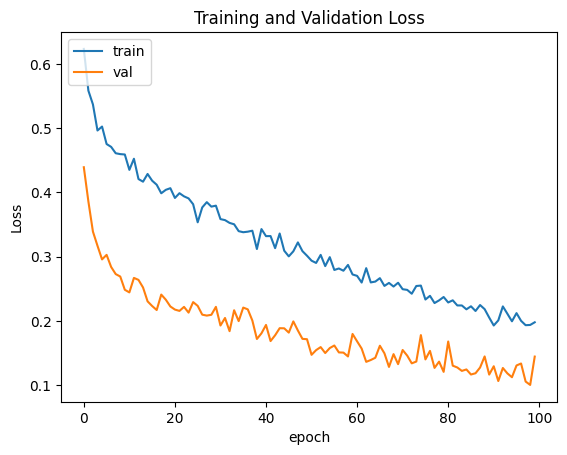

In [ ]:
import keras
from matplotlib import pyplot as plt


plt.plot(xception_best.history['loss'])
plt.plot(xception_best.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

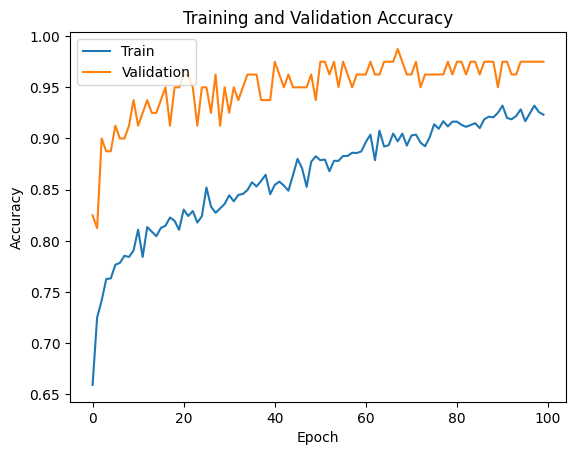

In [ ]:
import matplotlib.pyplot as plt

# Assuming `xception_best` is the history object returned by `model.fit`
history = xception_best.history

# Plot training & validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model = load_model('/content/dataset/Model/xception_100.h5')

1/1 [==============================] - 3s 3s/step


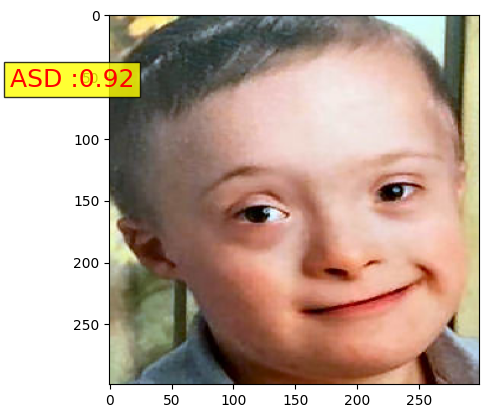

In [ ]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('/content/dataset/test/Autistic/ta.014.jpg', target_size=(299, 299))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='NASD :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='yellow',alpha=0.8))
else:
    value ='ASD :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,horizontalalignment='right',
        verticalalignment='bottom',bbox=dict(facecolor='yellow',alpha=0.8))

plt.imshow(img1)
plt.show()

1/1 [==============================] - 0s 31ms/step


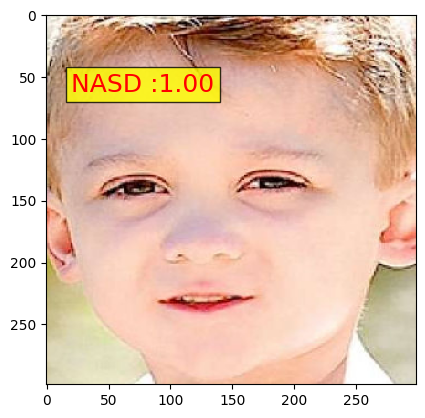

In [ ]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('/content/dataset/test/Non_Autistic/tna.005.jpg', target_size=(299, 299))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='NASD :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='yellow',alpha=0.8))
else:
    value ='ASD :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,horizontalalignment='right',
        verticalalignment='bottom',bbox=dict(facecolor='yellow',alpha=0.8))

plt.imshow(img1)
plt.show()

In [6]:
import pandas as pd
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Reset the test set (if needed)
test_set.reset()

# Measure inference time
start_inference_time = time.time()
ytesthat = model.predict_generator(test_set)
end_inference_time = time.time()
inference_time = end_inference_time - start_inference_time

print(f"Inference time: {inference_time} seconds")

# Create a DataFrame to store the results
df = pd.DataFrame({
    'filename': test_set.filenames,
    'predict': ytesthat[:, 0],
    'y': test_set.classes
})

# Convert the predicted probabilities to binary predictions
y_pred_binary = (ytesthat > 0.5).astype(int)

# Get the true labels from the test set
y_true = test_set.classes

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_binary)

# Calculate precision
precision = precision_score(y_true, y_pred_binary)

# Calculate recall
recall = recall_score(y_true, y_pred_binary)

# Calculate F1 score
f1 = f1_score(y_true, y_pred_binary)

# Print the metrics
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


NameError: name 'test_set' is not defined

In [ ]:

pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

In [ ]:

misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 280 Testing images : %d'%misclassified['y'].count())


Total misclassified image from 280 Testing images : 27


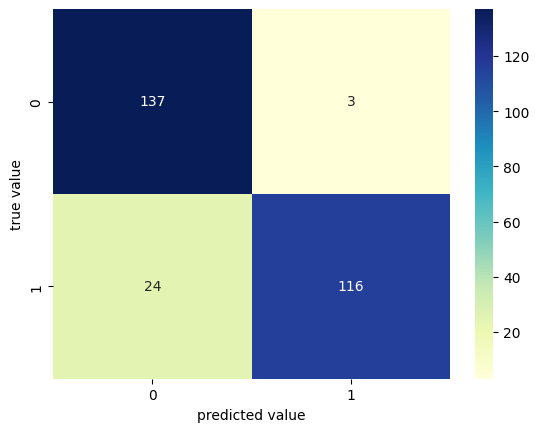

In [ ]:
#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

In [1]:
print(df['y'].unique())
print(df['y_pred'].unique())

NameError: name 'df' is not defined

In [3]:
import pandas as pd

NameError: name 'test_set' is not defined

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

#Training Set
train_set = train_datagen.flow_from_directory('/content/dataset/train_ASD_DATA/train',
                                             target_size=(299,299),
                                             batch_size=10,
                                              shuffle=False,
                                             class_mode='binary')

Found 2526 images belonging to 2 classes.


In [ ]:

import pandas as pd
train_set.reset
ytrainhat = model.predict_generator(train_set)
df = pd.DataFrame({
    'filename':train_set.filenames,
    'predict':ytrainhat[:,0],
    'y':train_set.classes
})

<ipython-input-26-86d4ed593533>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ytrainhat = model.predict_generator(train_set)


In [ ]:

pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

In [ ]:

misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 2526 Training images : %d'%misclassified['y'].count())

Total misclassified image from 2526 Training images : 52


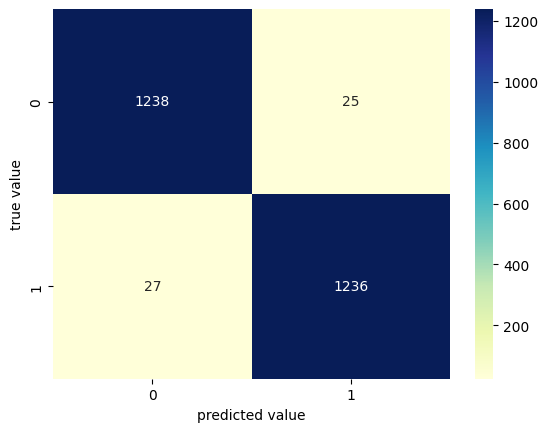

In [ ]:

#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:

import pandas as pd
valid_set.reset
yvalidhat = model.predict_generator(valid_set)
df = pd.DataFrame({
    'filename':valid_set.filenames,
    'predict':yvalidhat[:,0],
    'y':valid_set.classes
})


<ipython-input-30-853db96b44e2>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  yvalidhat = model.predict_generator(valid_set)


In [ ]:

pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

In [ ]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 80 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 80 Validation images : 2


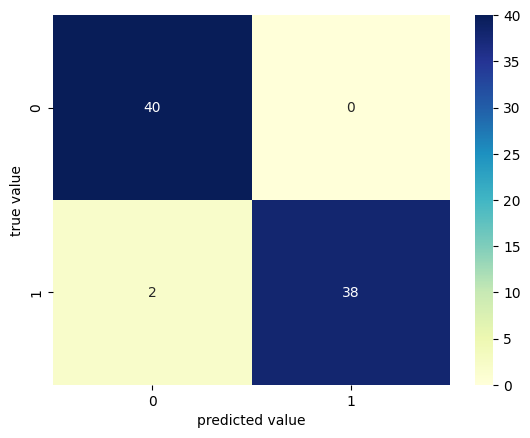

In [ ]:

#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

t-sne visualization

Found 280 images belonging to 2 classes.
1/1 [==============================] - 5s 5s/step


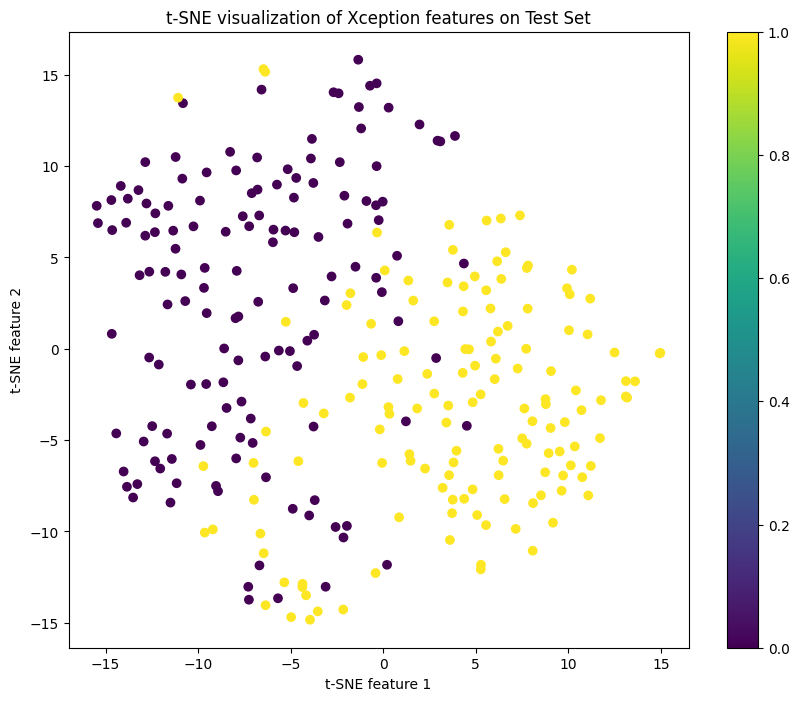

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.manifold import TSNE

# Load the saved model
model = load_model('/content/dataset/Model/xception_best_model.h5')

# Remove the last layer (classification layer) to get features
feature_extractor = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)

# Prepare your test dataset
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32
img_size = (299, 299)  # Xception input size

test_set = datagen.flow_from_directory(
    '/content/dataset/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Extract features
features = []
labels = []
for i in range(len(test_set)):
    x, y = test_set[i]
    feature = feature_extractor.predict(x)
    features.append(feature)
    labels.append(y)

features = np.concatenate(features)
labels = np.concatenate(labels)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

# Visualize the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('t-SNE visualization of Xception features on Test Set')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


Found 280 images belonging to 2 classes.
1/1 [==============================] - 3s 3s/step


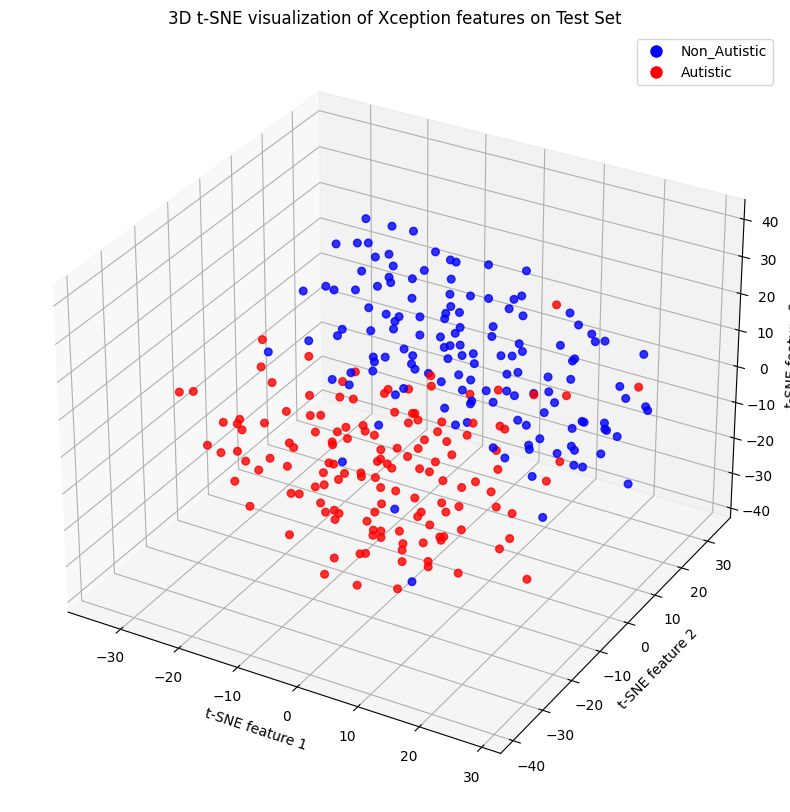

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.manifold import TSNE
import tensorflow as tf

# Load the saved model
model = load_model('/content/dataset/Model/xception_best_model.h5')

# Remove the last layer (classification layer) to get features
feature_extractor = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)

# Prepare your test dataset
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32
img_size = (299, 299)  # Xception input size

test_set = datagen.flow_from_directory(
    '/content/dataset/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Extract features
features = []
labels = []
for i in range(len(test_set)):
    x, y = test_set[i]
    feature = feature_extractor.predict(x)
    features.append(feature)
    labels.append(y)

features = np.concatenate(features)
labels = np.concatenate(labels)

# Apply t-SNE
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(features)

# Visualize the results in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Color map: blue for non-autistic (0), red for autistic (1)
colors = ['blue' if label == 0 else 'red' for label in labels]

scatter = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], tsne_results[:, 2], c=colors, s=30, alpha=0.8)

# Create legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Non_Autistic',
                              markerfacecolor='blue', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Autistic',
                              markerfacecolor='red', markersize=10)]
ax.legend(handles=legend_elements)

ax.set_title('3D t-SNE visualization of Xception features on Test Set')
ax.set_xlabel('t-SNE feature 1')
ax.set_ylabel('t-SNE feature 2')
ax.set_zlabel('t-SNE feature 3')

plt.show()


1/1 [==============================] - 0s 20ms/step


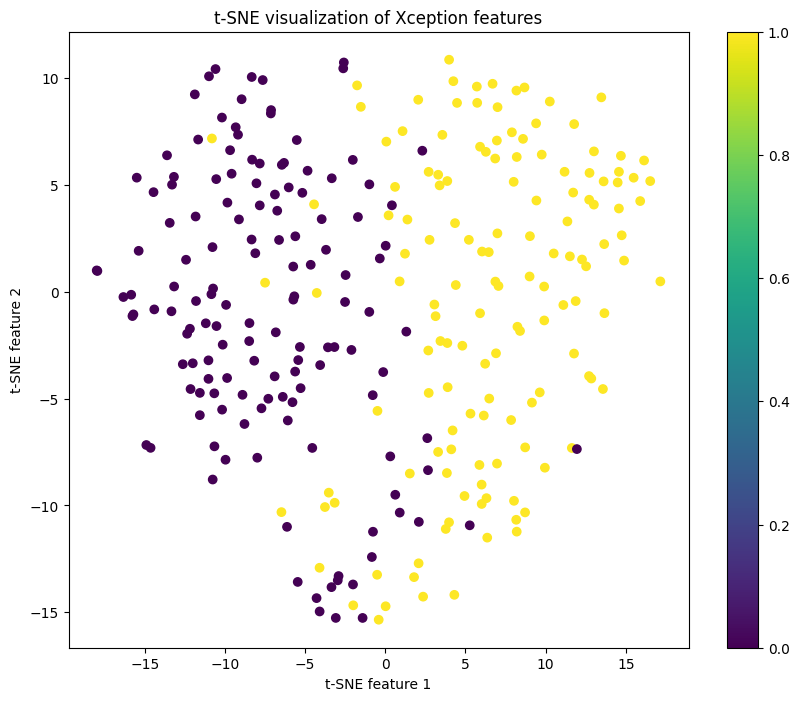

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.manifold import TSNE
import os

# Load the saved model
model = load_model('/content/dataset/Model/xception_best_model.h5')

# Remove the last layer (classification layer) to get features
feature_extractor = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)

def process_data_tsne(data_dir):
    """
    Process images for t-SNE visualization.

    Parameters:
    data_dir: Directory containing the images

    Returns:
    Numpy array of image features and labels
    """
    features = []
    labels = []

    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        label = 0 if class_name == 'Non_Autistic' else 1

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size=(299, 299))  # Xception input size
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.  # Normalize the image

            feature = feature_extractor.predict(img_array)
            features.append(feature.flatten())
            labels.append(label)

    return np.array(features), np.array(labels)

# Process the image data and get the features and labels
data_dir = '/content/dataset/test'
features, labels = process_data_tsne(data_dir)

# Perform t-SNE on features
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

# Visualize the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('t-SNE visualization of Xception features')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.manifold import TSNE
import os
from PIL import Image, ImageDraw
import tensorflow as tf

# Load the saved model
model = load_model('/content/dataset/Model/xception_best_model.h5')

# Remove the last layer (classification layer) to get features
feature_extractor = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)

def process_data_tsne(data_dir):
    features = []
    image_paths = []
    labels = []

    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        label = 0 if class_name == 'Non_Autistic' else 1

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size=(299, 299))  # Xception input size
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.  # Normalize the image

            feature = feature_extractor.predict(img_array)
            features.append(feature.flatten())
            image_paths.append(img_path)
            labels.append(label)

    return np.array(features), image_paths, np.array(labels)

def visualise_tsne_images(tsne_data, image_paths, labels):
    tx = tsne_data[:, 0]
    ty = tsne_data[:, 1]

    tx = (tx - np.min(tx)) / (np.max(tx) - np.min(tx))
    ty = (ty - np.min(ty)) / (np.max(ty) - np.min(ty))

    width = 4000
    height = 3000
    max_dim = 200

    full_image = Image.new('RGBA', (width, height))
    for img_path, x, y, label in zip(image_paths, tx, ty, labels):
        tile = Image.open(img_path)
        rs = max(1, tile.width / max_dim, tile.height / max_dim)
        tile = tile.resize((int(tile.width / rs), int(tile.height / rs)), Image.ANTIALIAS)
        tile_width, tile_height = tile.size
        draw = ImageDraw.Draw(tile)
        draw.rectangle((0, 0, tile_width - 1, tile_height - 1), outline='blue' if label == 0 else 'red', width=8)
        full_image.paste(tile, (int((width - max_dim) * x), int((height - max_dim) * (1 - y))), mask=tile.convert('RGBA'))

    plt.figure(figsize=(30, 28))
    plt.imshow(full_image)
    plt.axis('off')
    plt.show()

# Process the image data and get the features and labels
data_dir = '/content/dataset/test'
features, image_paths, labels = process_data_tsne(data_dir)

# Perform t-SNE on features
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

# Visualise class images in 2-dimensional space
visualise_tsne_images(tsne_results, image_paths, labels)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.manifold import TSNE
import os
from PIL import Image, ImageDraw
import tensorflow as tf

# Load the saved model
model = load_model('/content/dataset/Model/xception_best_model.h5')

# Remove the last layer (classification layer) to get features
feature_extractor = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)

def process_data_tsne(data_dir):
    features = []
    image_paths = []
    labels = []

    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        label = 0 if class_name == 'Non_Autistic' else 1

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size=(299, 299))  # Xception input size
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.  # Normalize the image

            feature = feature_extractor.predict(img_array)
            features.append(feature.flatten())
            image_paths.append(img_path)
            labels.append(label)

    return np.array(features), image_paths, np.array(labels)

def visualise_tsne_images(tsne_data, image_paths, labels):
    tx = tsne_data[:, 0]
    ty = tsne_data[:, 1]

    tx = (tx - np.min(tx)) / (np.max(tx) - np.min(tx))
    ty = (ty - np.min(ty)) / (np.max(ty) - np.min(ty))

    width = 4000
    height = 3000
    max_dim = 200

    full_image = Image.new('RGBA', (width, height))
    for img_path, x, y, label in zip(image_paths, tx, ty, labels):
        tile = Image.open(img_path)
        rs = max(1, tile.width / max_dim, tile.height / max_dim)
        tile = tile.resize((int(tile.width / rs), int(tile.height / rs)), Image.ANTIALIAS)
        tile_width, tile_height = tile.size
        draw = ImageDraw.Draw(tile)
        draw.rectangle((0, 0, tile_width - 1, tile_height - 1), outline='blue' if label == 0 else 'red', width=8)
        full_image.paste(tile, (int((width - max_dim) * x), int((height - max_dim) * (1 - y))), mask=tile.convert('RGBA'))

    plt.figure(figsize=(30, 28))
    plt.imshow(full_image)
    plt.axis('off')
    plt.show()

# Process the image data and get the features and labels
data_dir = '/content/dataset/valid'
features, image_paths, labels = process_data_tsne(data_dir)

# Perform t-SNE on features
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

# Visualise class images in 2-dimensional space
visualise_tsne_images(tsne_results, image_paths, labels)


Output hidden; open in https://colab.research.google.com to view.

1/1 [==============================] - 0s 32ms/step


<ipython-input-47-a2ae6f7835ba>:54: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  tile = tile.resize((int(tile.width / rs), int(tile.height / rs)), Image.ANTIALIAS)


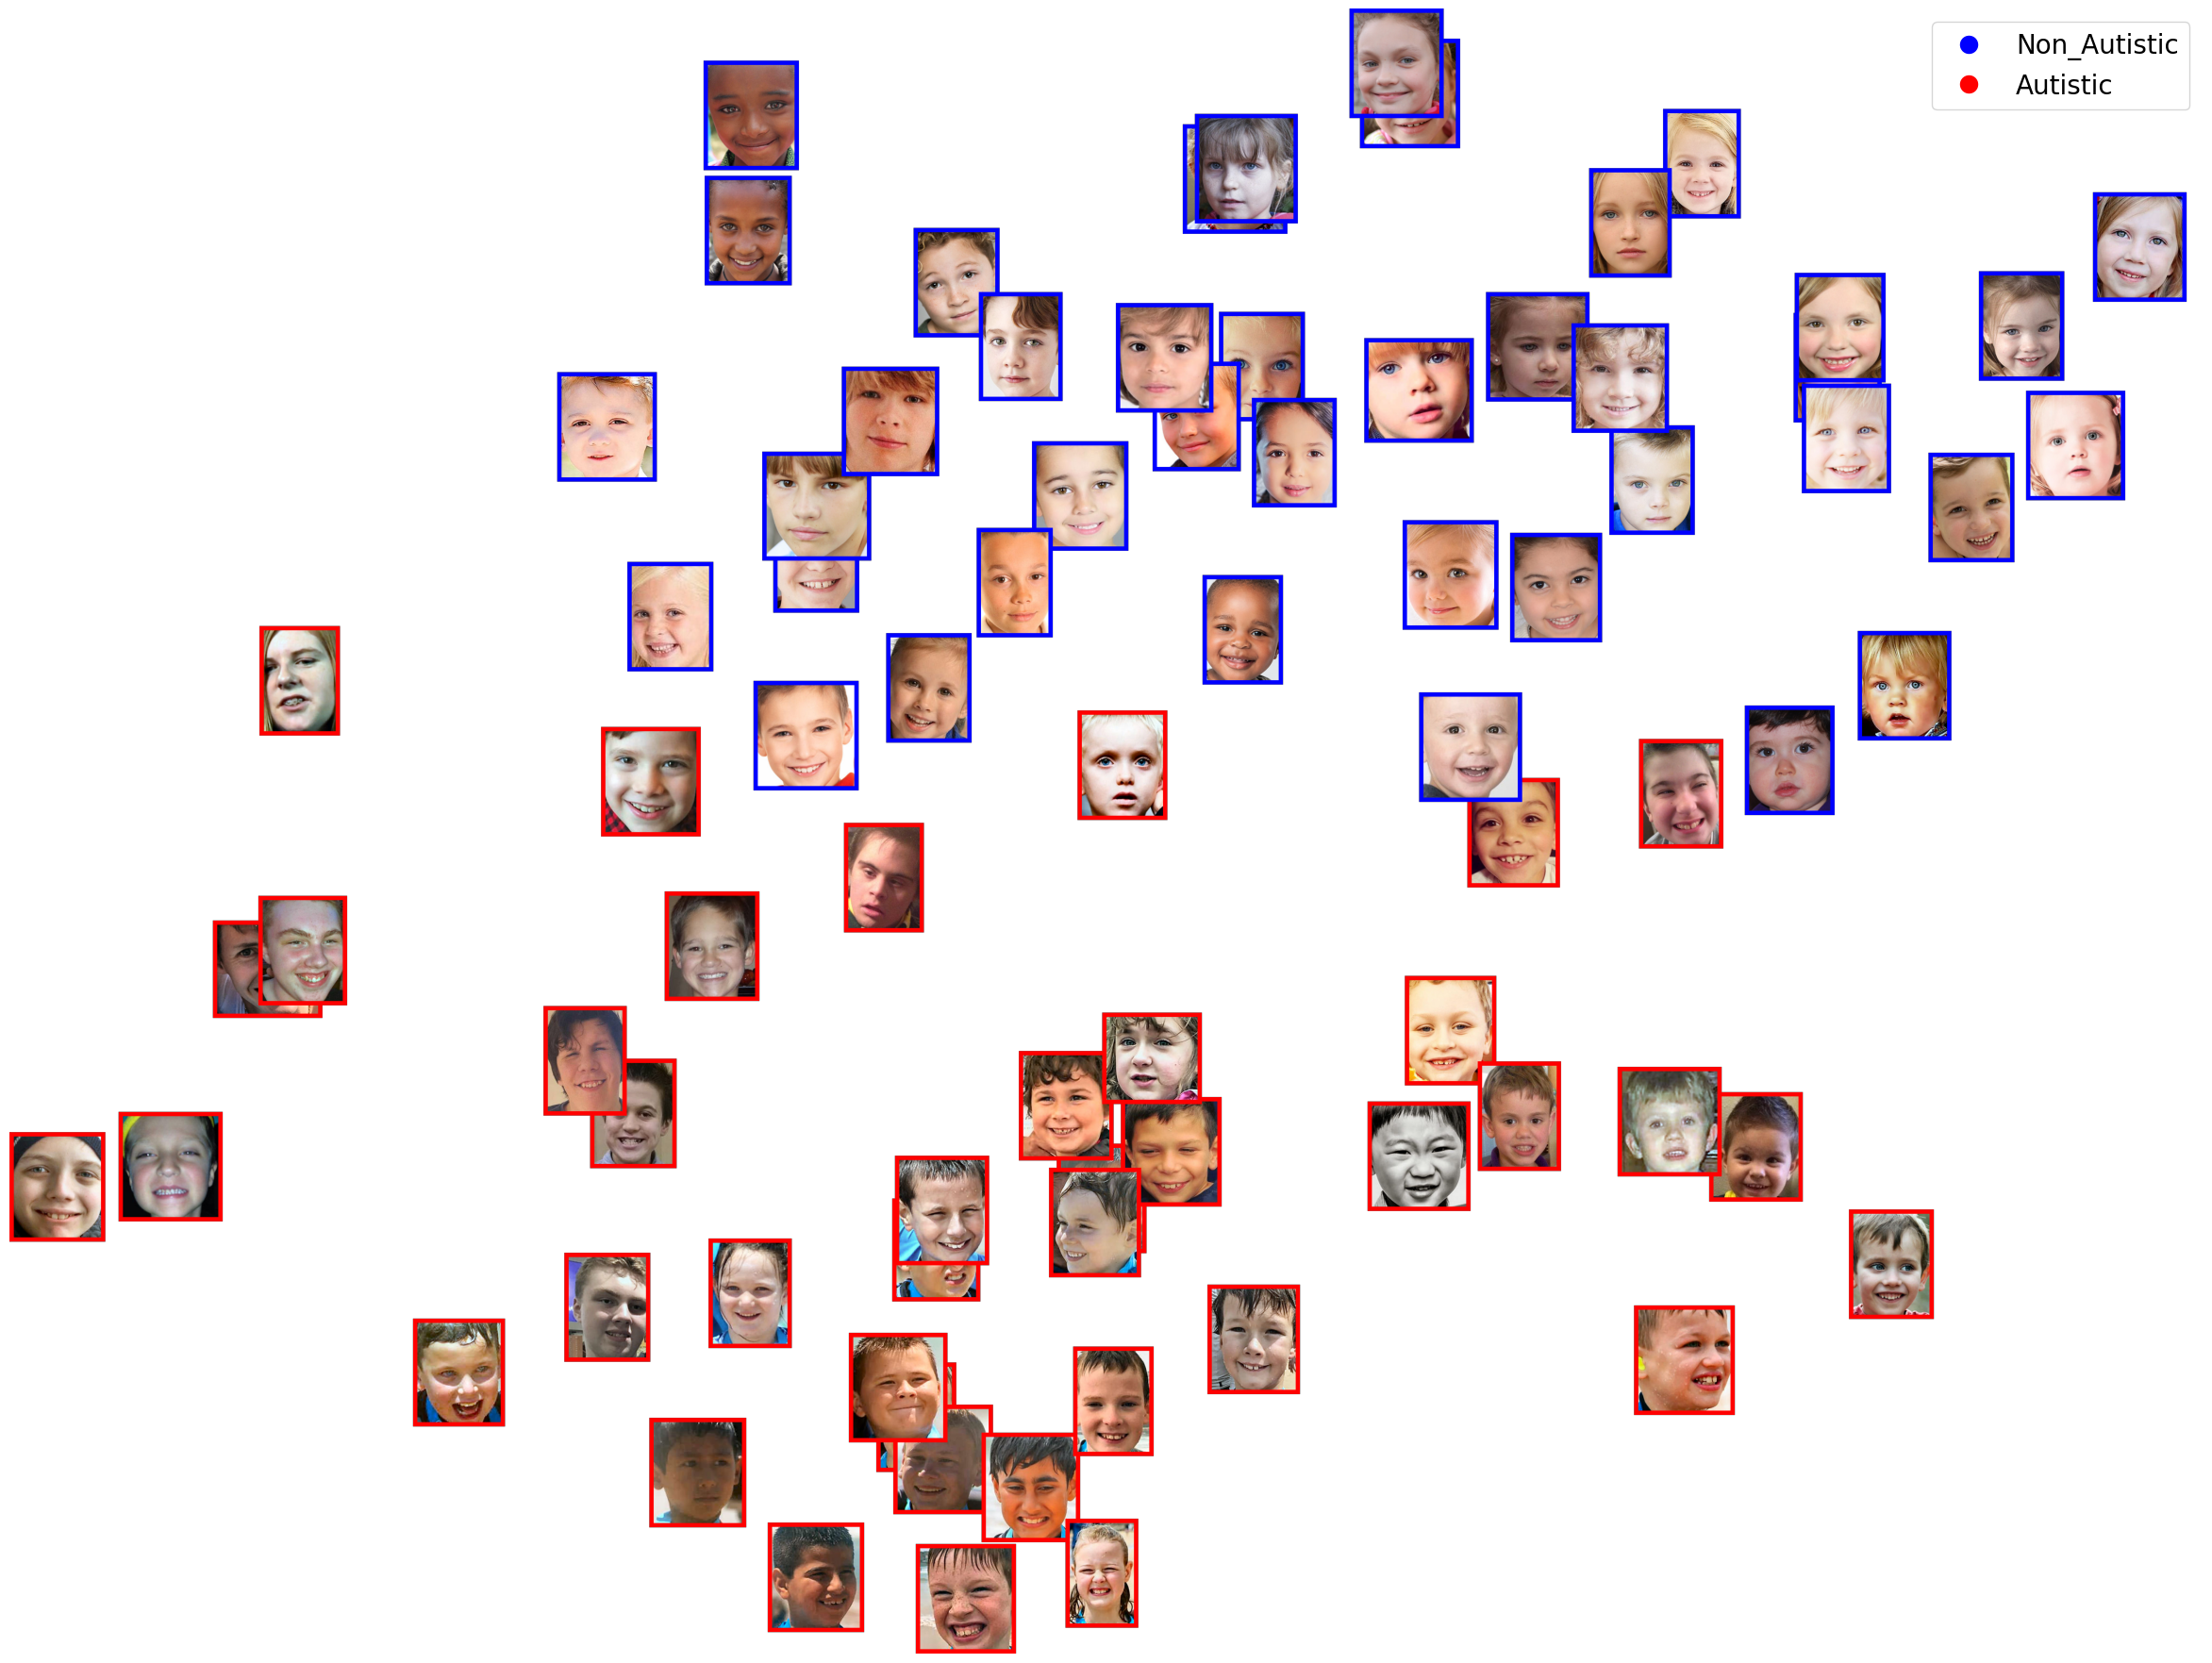